# Resumos e um pouco de Visualização no pandas


## Resumo

Vamos ver alguns métodos para analisar nossas tabelas (dataframes)

Além disso, vamos usar os plot de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

OBS: O pandas usa o matplotlib (que vimos na seção de "módulos e bibliotecas") para plotar gráficos.<br>
Se quiser personalizar mais do que o padrão do pandas, importe o matplotlib e use os métodos do matplotlib

- Preparando as bases de dados (o que fizemos na última aula)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# importando os arquivos
vendasDf = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtosDf = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';')
lojasDf = pd.read_csv(r'Contoso - Lojas.csv', sep=';')
clientesDf = pd.read_csv(r'Contoso - Clientes.csv', sep=';')

# limpando apenas as colunas que queremos
clientesDf = clientesDf[['ID Cliente', 'E-mail']]
produtosDf = produtosDf[['ID Produto', 'Nome do Produto']]
lojasDf = lojasDf[['ID Loja', 'Nome da Loja']]

# mesclando e renomeando os dataframes
vendasDf = vendasDf.merge(produtosDf, on='ID Produto')
vendasDf = vendasDf.merge(lojasDf, on='ID Loja')
vendasDf = vendasDf.merge(clientesDf, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
print(vendasDf)

        Numero da Venda Data da Venda Data do Envio  ID Canal  ID Loja  \
0                     1    01/01/2017    02/01/2017         1       86   
1                880458    23/11/2017    23/11/2017         0      306   
2                191019    20/03/2017    21/03/2017         1      172   
3                 18610    08/01/2017    10/01/2017         2      200   
4                287704    23/04/2017    26/04/2017         3       76   
...                 ...           ...           ...       ...      ...   
980637           878244    23/11/2017    23/11/2017         0      110   
980638           920243    09/12/2017    10/12/2017         1      261   
980639           467482    21/06/2017    25/06/2017         4      115   
980640           853643    13/11/2017    20/11/2017         7      115   
980641           903958    02/12/2017    02/12/2017         0      222   

        ID Produto  ID Promocao  ID Cliente  Quantidade Vendida  \
0              981            2        6825 

### Qual cliente que comprou mais vezes?

- Usaremos o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
- Usaremos o método .plot() para exibir um gráfico

karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail do Cliente, Length: 38907, dtype: int64


<Axes: >

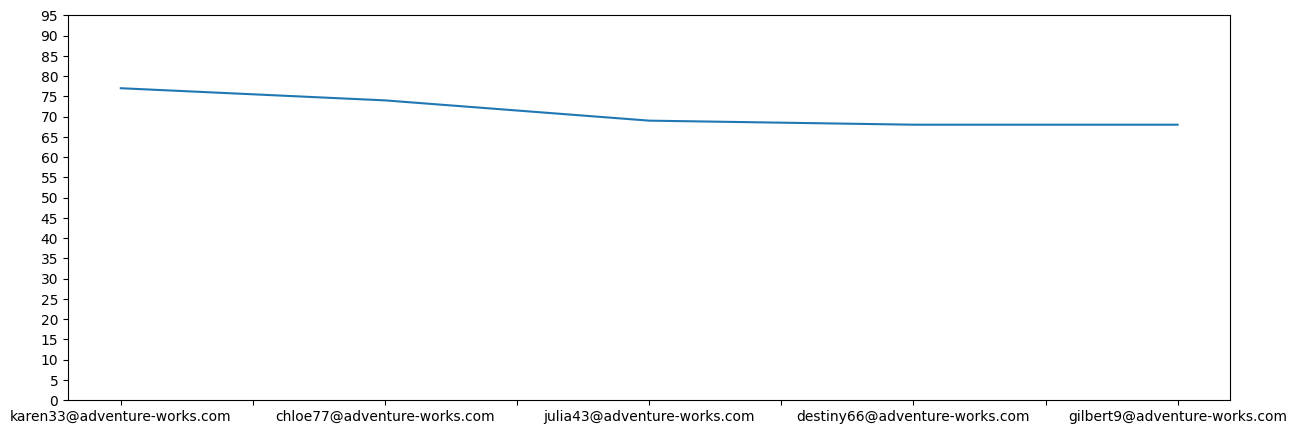

In [5]:
frequenciaClientes=vendasDf['E-mail do Cliente'].value_counts()
print(frequenciaClientes)
# frequenciaClientes.plot() # grafico completo

# frequenciaClientes[:5].plot() # aqui escolhemos os cinco primeiros clientes da tabela

# frequenciaClientes[:5].plot(figsize=(15,5)) # escolhemos com figsize o tamanho do grafico a ser mostrado

frequenciaClientes[:5].plot(figsize=(15,5),yticks=range(0,100,5)) # aqui colocamos o eixo y para mostrar valores de 0 a 100 de 5 em 5, alem das outras marcacoes ja feitas

### Qual a Loja que mais vendeu?

- Usaremos o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as quantidades de vendas, por exemplo)

In [15]:
vendasLojas=vendasDf.groupby('Nome da Loja').sum()

# vendasLojas=vendasLojas['Quantidade Vendida'] # formatacao diferente
# display(vendasLojas)

vendasLojas=vendasLojas[['Quantidade Vendida']] # nao precisamos passar o nome da loja pois ele se tornou o indice no novo dataframe

display(vendasLojas) # importante notar que a tabela mostra o valor vendido de cada loja mas ainda nao esta ordenado de maneira crescente ou decrescente

C:\Users\jharbes\AppData\Local\Temp\ipykernel_17624\2902274035.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vendasLojas=vendasDf.groupby('Nome da Loja').sum()


,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


- Agora precisamos pegar o maior valor. Temos 2 formas:
    1. Ordenar o dataframe em ordem decrescente de Quantidade Vendida
        - Método .sort_values
    2. Pegar o Maior valor diretamente
        - Métodos .max() e .idxmax()

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<Axes: xlabel='Nome da Loja'>

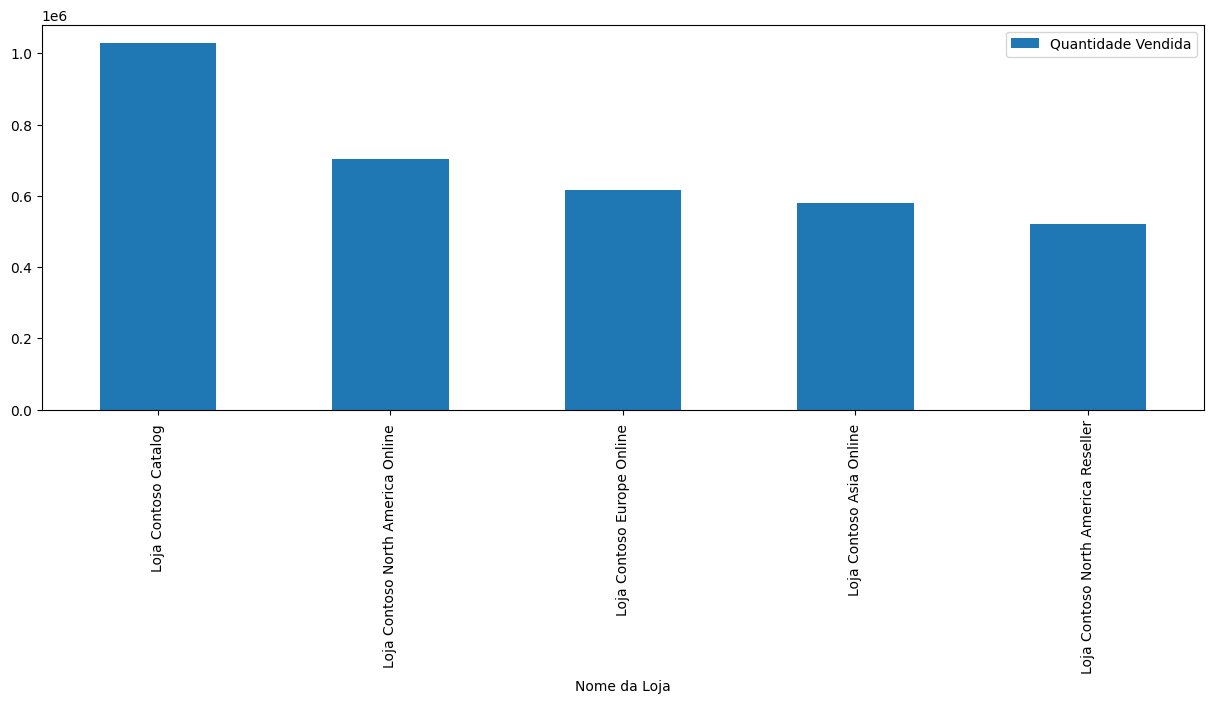

In [21]:
# ordenando o dataframe

vendasLojas=vendasLojas.sort_values('Quantidade Vendida', ascending=False) # ascending=False para que ele ordene de forma decrescente)

display(vendasLojas)

# podemos plotar em um gráfico

vendasLojas[:5].plot(figsize=(15,5),kind='bar') # figsize ajusta o tamanho do grafico, kind ajusta para um grafico de barra em vez de linha) # figsize ajusta o tamanho do grafico, kind ajusta para um grafico de barra em vez de linha


In [22]:
# pegando o maior valor e se índice

maiorValor=vendasLojas['Quantidade Vendida'].max()

melhorLoja=vendasLojas['Quantidade Vendida'].idxmax()

print(f'{melhorLoja=} {maiorValor=}')

melhorLoja='Loja Contoso Catalog ' maiorValor=1029117


### Qual produto que menos vendeu?

- Já temos uma lista criada para isso, basta verificarmos o final da lista (já que ela está ordenada) ou então usarmos os métodos:
    1. min()
    2. idxmin()

In [25]:
print(vendasLojas[-1:]) # nao funciona so com o -1 pois os dataframes nao aceitam apenas o indice, aceitam apenas ranges

# ou

print(vendasLojas['Quantidade Vendida'].idxmin())

                       Quantidade Vendida
Nome da Loja                             
Loja Contoso Venezia                  234
Loja Contoso Venezia 
